In [24]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3
from math import pi
from pandas.plotting import parallel_coordinates
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize plotly
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

# List files in the input directory
import os
print(os.listdir("input"))


['cwurData.csv', 'database_earthquake.csv', 'education_expenditure_supplementary_data.csv', 'MedianHouseholdIncome2015.csv', 'PercentagePeopleBelowPovertyLevel.csv', 'PercentOver25CompletedHighSchool.csv', 'PoliceKillingsUS.csv', 'school_and_country_table.csv', 'shanghaiData.csv', 'ShareRaceByCity.csv', 'timesData.csv']


Matrix and Bar Plots (Missingno)

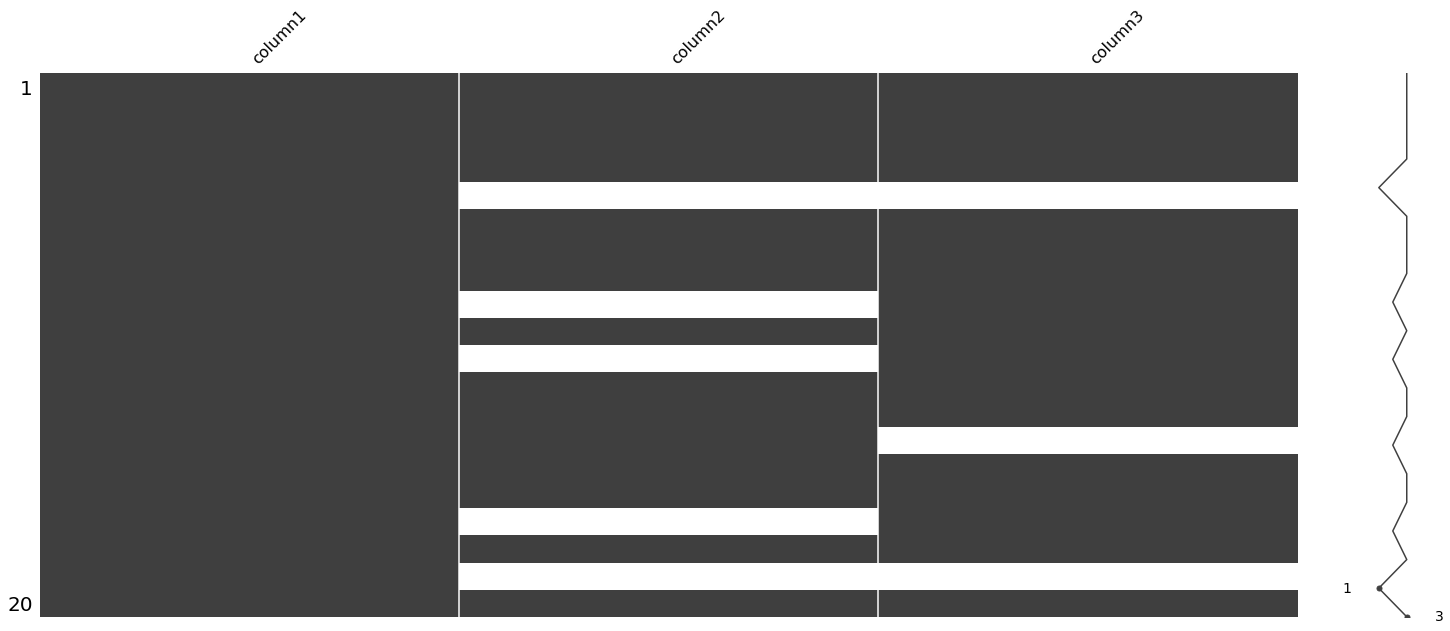

In [25]:
import missingno as msno

# Create a dictionary with sample data
dictionary = {
    "column1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "column2": [1, 2, 3, 4, np.nan, 6, 7, 8, np.nan, 10, np.nan, 12, 13, 14, 15, 16, np.nan, 18, np.nan, 20],
    "column3": [1, 2, 3, 4, np.nan, 6, 7, 8, 9, 10, 11, 12, 13, np.nan, 15, 16, 17, 18, np.nan, 20]
}

# Create a DataFrame from the dictionary
data_missingno = pd.DataFrame(dictionary)

# Visualize missing data
msno.matrix(data_missingno)
plt.show()


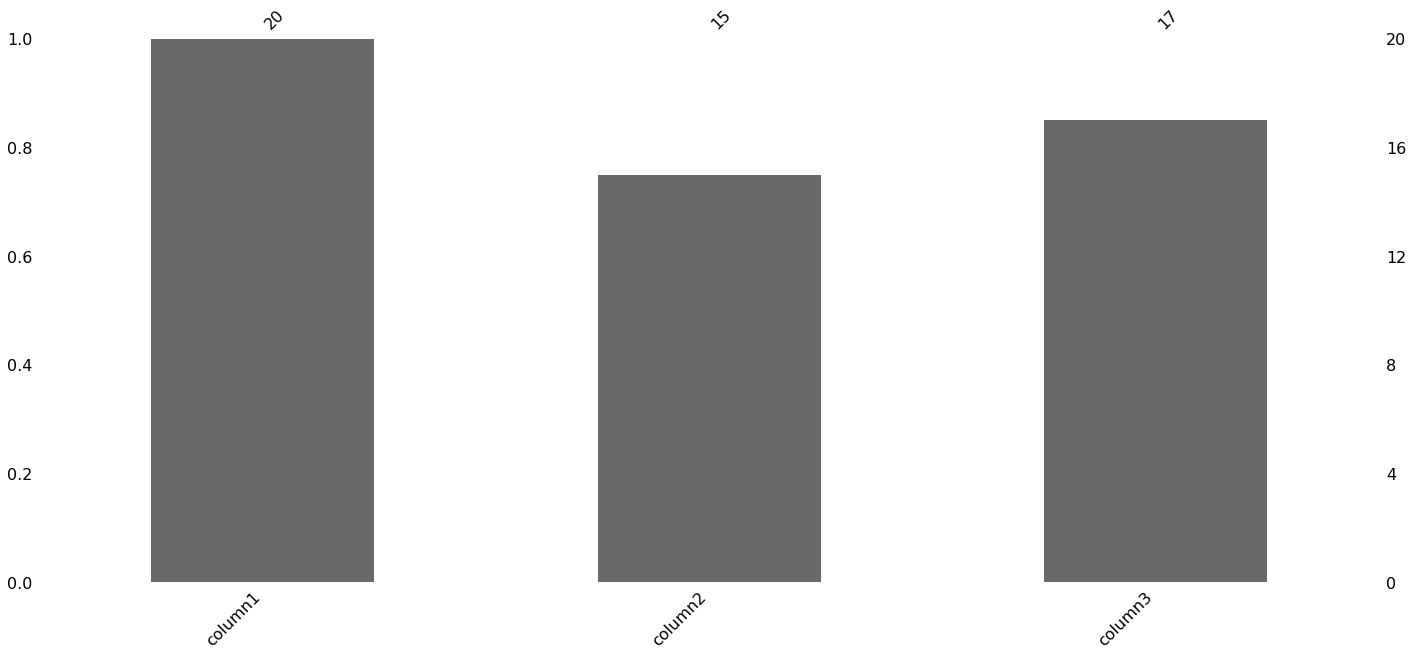

In [26]:
# missingno bar plot
msno.bar(data_missingno)
plt.show()

Parallel Plots (Pandas)

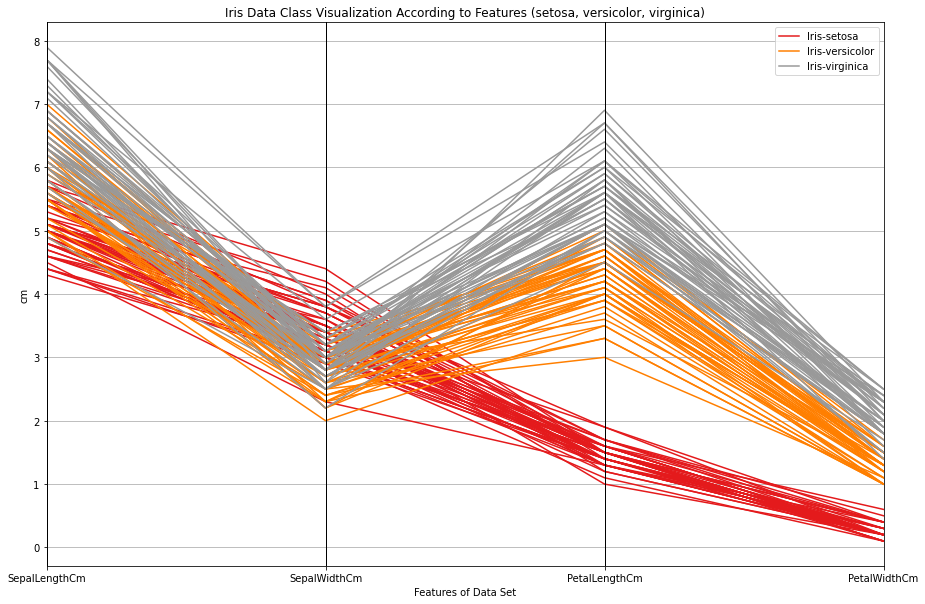

In [38]:
# Load the Iris data
data = pd.read_csv('input/Iris.csv')

# Drop the 'Id' column
data = data.drop(['Id'], axis=1)

# Make the plot
plt.figure(figsize=(15, 10))
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set1"))
plt.title("Iris Data Class Visualization According to Features (setosa, versicolor, virginica)")
plt.xlabel("Features of Data Set")
plt.ylabel("cm")
plt.savefig('graph.png')
plt.show()


Network Charts (Networkx)

In [39]:
# Calculate the correlation between individuals.
corr = data.iloc[:,0:4].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


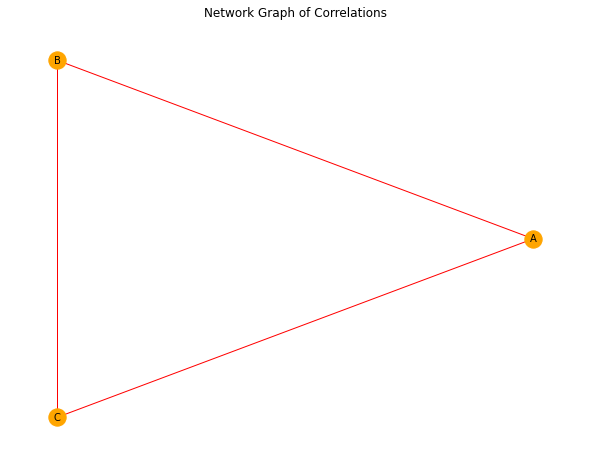

In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Example correlation matrix
# Replace this with your actual correlation matrix
corr = pd.DataFrame({
    'A': [1, 0.8, -0.5],
    'B': [0.8, 1, -0.3],
    'C': [-0.5, -0.3, 1]
}, index=['A', 'B', 'C'])

# Transform the correlation matrix into a links DataFrame
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

# Set threshold for filtering
threshold = -1

# Filter out self-loops and keep only correlations above the threshold
links_filtered = links[(links['value'] >= threshold) & (links['var1'] != links['var2'])]

# Build the graph
G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr='value')

# Plot the network
plt.figure(figsize=(8, 6))
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)
plt.title('Network Graph of Correlations')
plt.show()


Venn (Matplotlib)

In [42]:
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


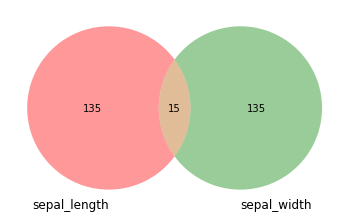

In [43]:
# venn2
from matplotlib_venn import venn2
sepal_length = data.iloc[:,0]
sepal_width = data.iloc[:,1]
petal_length = data.iloc[:,2]
petal_width = data.iloc[:,3]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

Donut (Matplotlib)


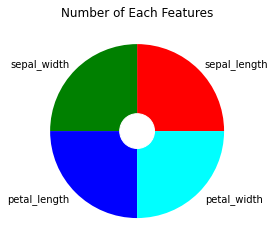

In [44]:
# donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

Spider Chart (Matplotlib)


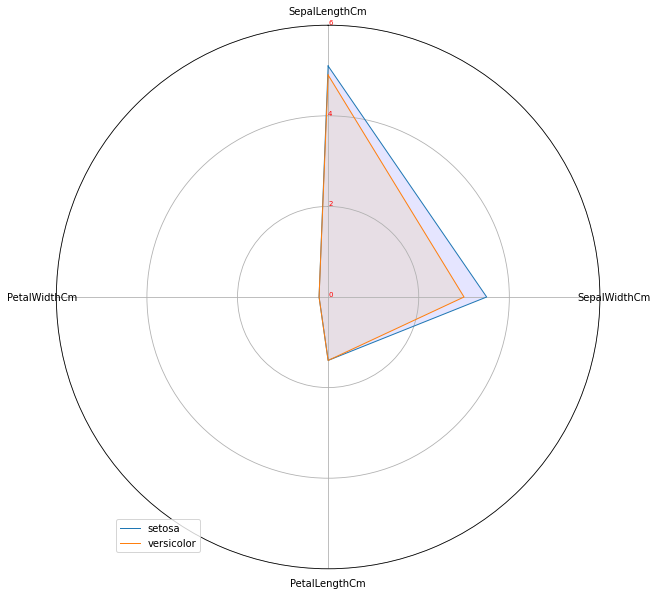

In [45]:
# spider graph
categories = list(data)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

Cluster Map (Seaborn)


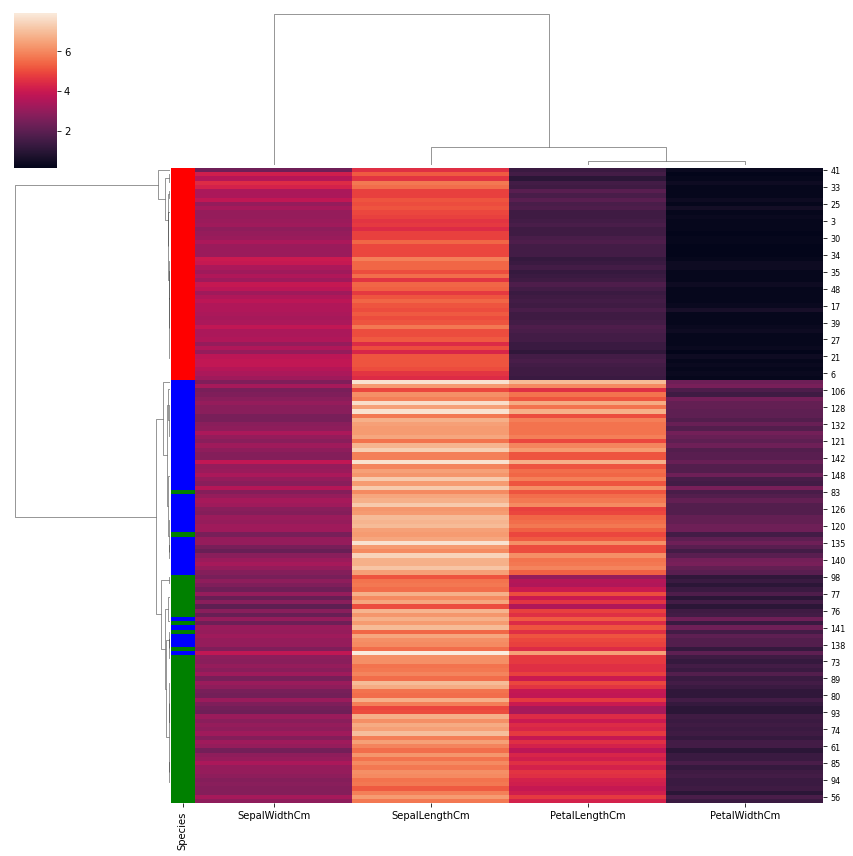

In [46]:
# cluster map (dendogram and tree)
df = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df1 = data.Species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

Inset Plots (Plotly)


In [47]:
import plotly.graph_objects as go
from plotly.offline import iplot
import pandas as pd

# Example DataFrame
# Replace this with your actual data
df = pd.DataFrame({
    'SepalLengthCm': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9]
})

# Scatter plot (trace1)
trace1 = go.Scatter(
    x=df.index,
    y=df.SepalLengthCm,
    mode="markers",
    xaxis='x2',
    yaxis='y2',
    name="SepalLengthCm",
    marker=dict(color='rgba(0, 112, 20, 0.8)')
)

# Histogram (trace2)
trace2 = go.Histogram(
    x=df.SepalLengthCm,
    opacity=0.75,
    name="Sepal Length(Cm)",
    marker=dict(color='rgba(10, 200, 250, 0.6)')
)

# Combine traces into data
data = [trace1, trace2]

# Layout with secondary x and y axes
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.7],
        title='Index'
    ),
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',
        title='Sepal Length (Cm)'
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
        title='Sepal Length (Cm)'
    ),
    title='Sepal Length (Cm) Histogram and Scatter Plot'
)

# Create the figure and plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)


Basic 3D Scatter Plot (Plotly)


In [49]:
# import data again
data = pd.read_csv('input/Iris.csv')
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [50]:
import plotly.graph_objects as go
import pandas as pd

# Example DataFrame
# Replace this with your actual data
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [5, 4, 3, 2, 1],
    'z': [2, 3, 4, 5, 6]
})

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['x'],
    y=df['y'],
    z=df['z'],
    mode='markers',
    marker=dict(
        size=8,
        color='rgba(255, 0, 0, 0.8)',  # Red color with opacity
        line=dict(
            width=2,
            color='rgba(0, 0, 0, 0.8)'  # Black edge color with opacity
        )
    )
)])

# Update layout
fig.update_layout(
    title='3D Scatter Plot Example',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

# Show the plot
fig.show()
